<a href="https://colab.research.google.com/github/fudmhz/TP5-Stackoverflow/blob/main/TP5_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer

# TP5 Catégorisez automatiquement des questions

In this notebook we extract data from stackoverflow questions and perform an exploratory data analysis of the dataset.

The data can be originally found at: https://data.stackexchange.com/stackoverflow/query/new



**Questions we can ask:**
* Is all the text in english?
* Is the tagging correct (in other words, can we use it as ground truth?)
* What is frequency of tags
* For a fixed tag, can we observe a pattern in the words used for writing the text or title? 

# First exploration: 50k posts containining Title, tags and text
 
We download 50K random posts into a csv from the stackoverflow dataset. 

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_path = os.path.join('.','data')

gdd.download_file_from_google_drive(file_id='1yAPuhmfgn43oeRkoU8wHafdPVNGavV5Q',
                                    dest_path=data_path,
                                    unzip=True)
# remove .zip data
!rm -rf 'data'

Unzipping...Done.


# 1. Exploratory analysis:



In [ ]:
df = pd.read_csv('QueryResults.csv')

In [ ]:
df.head(10)

,Id,Body,Title,Tags
0,227287,<p>I know how to find a method in java using a...,Can I use regular expressions to find a method...,<java><reflection>
1,46512,<p>In the build log I'd like to the start and ...,Can Visual Studio put timestamps in the build ...,<visual-studio><build>
2,924972,<p>I got a directory I want to copy to a numbe...,Msbuild copy to several locations based on lis...,<msbuild><copy><msbuild-task><msbuild-property...
3,847330,<p>During the work on my iPhone application th...,Why is my icon not being distributed to the de...,<iphone>
4,117422,<p>My Virtual Machine's clock drifts pretty si...,How can I resolve the drifting clock for my Vi...,<vmware><clock><drift>
5,610918,"<p>This question is not so much a ""How to crea...",GUI creation code layout theory?,<java><user-interface><swing>
6,421509,<p>Basically this code below returns the right...,sql help: how can I add quantities together?,<sql><database>
7,507234,<p>My company is in need of a federated identi...,Moving from ADFS to the Geneva Framework,<authorization><identity><federated-identity><...
8,822232,<p>I am running into what seems to me to be a ...,Is this a bug with Advantage Database?,<php><sql><advantage-database-server>
9,559659,<p>I’m using ReadDirectoryChangesW to spy a fo...,How to know a file is finished copying,<winapi><readdirectorychangesw><file-copying>


## 1.1 Tag analysis

Tags are written between less-than and greather-than signs on a single string.To work with individual tags we first have to process them using regex and create a list of tags that can be manipulated.

In [ ]:
# separate tags into a list of tags using a lambda function
get_tags = lambda x: re.findall("\<(.*?)\>", x)

df['Tags'] = df['Tags'].apply(get_tags)

df.head()


,Id,Body,Title,Tags
0,227287,<p>I know how to find a method in java using a...,Can I use regular expressions to find a method...,"[java, reflection]"
1,46512,<p>In the build log I'd like to the start and ...,Can Visual Studio put timestamps in the build ...,"[visual-studio, build]"
2,924972,<p>I got a directory I want to copy to a numbe...,Msbuild copy to several locations based on lis...,"[msbuild, copy, msbuild-task, msbuild-property..."
3,847330,<p>During the work on my iPhone application th...,Why is my icon not being distributed to the de...,[iphone]
4,117422,<p>My Virtual Machine's clock drifts pretty si...,How can I resolve the drifting clock for my Vi...,"[vmware, clock, drift]"


### 1.1.1 Tag histogram

An important statistic that we can extract from our dataset is the tag frequency. 

In [ ]:
tag_array = df['Tags'].to_numpy()

In [ ]:
tag_dict = {}
for tag_list in tag_array:
  for tag in tag_list:
    if tag in tag_dict:
      tag_dict[tag] += 1
    else:
      tag_dict[tag] = 1

In [ ]:
tag_dict = dict(sorted(tag_dict.items(), key=lambda item: item[1], reverse = True))

Now let's look at the histogram of the 100 most frequent tags

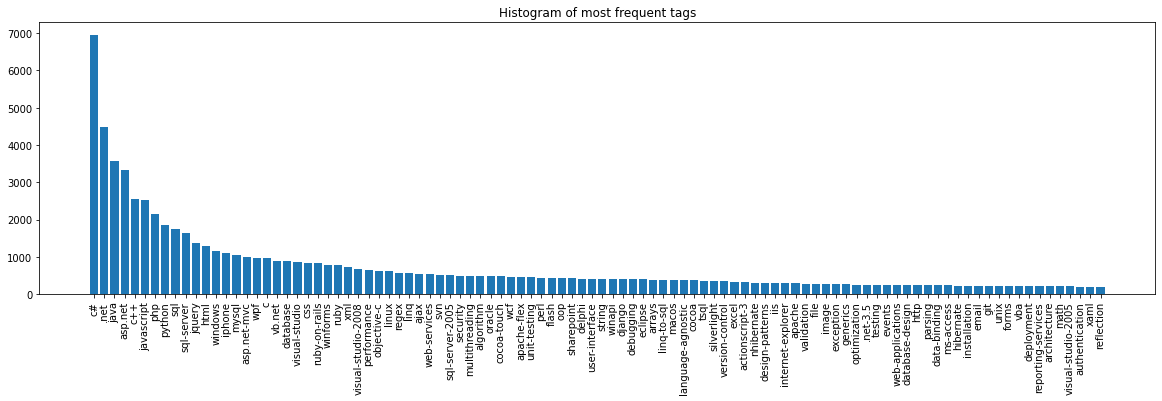

In [ ]:
n_tags = 100
plt.figure(figsize = (20, 5))
plt.bar(list(tag_dict.keys())[:n_tags],list(tag_dict.values())[:n_tags])
plt.xticks(rotation = 'vertical')
plt.title('Histogram of most frequent tags')
plt.show()

Now let's look at the histogram of the 100 less frequent tags

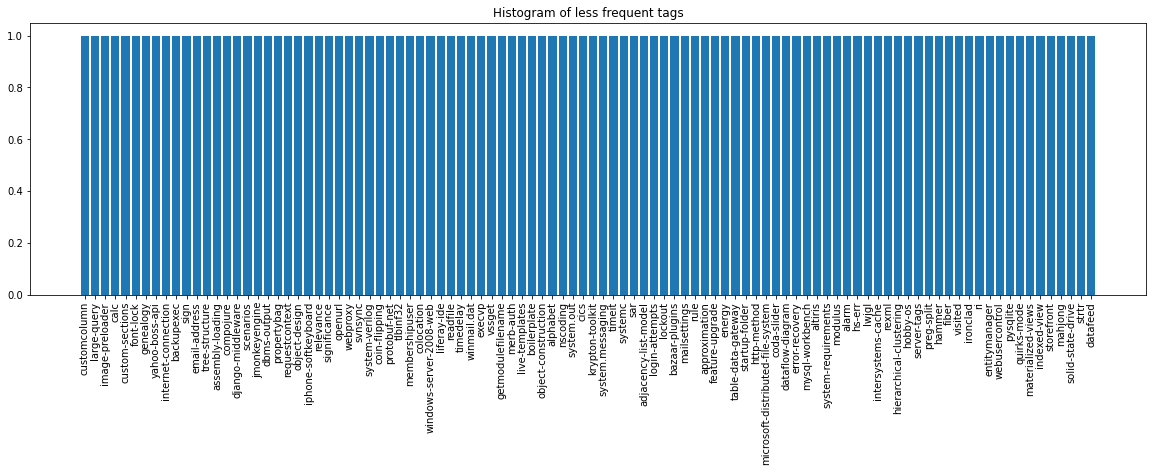

In [ ]:
n_tags = 100
plt.figure(figsize = (20, 5))
plt.bar(list(tag_dict.keys())[-n_tags:],list(tag_dict.values())[-n_tags:])
plt.xticks(rotation = 'vertical')
plt.title('Histogram of less frequent tags')
plt.show()

We can observe that that the distribution of tags is unequal: some tags are much more represented than others. The following plot contains the histogram of all tags.

[]

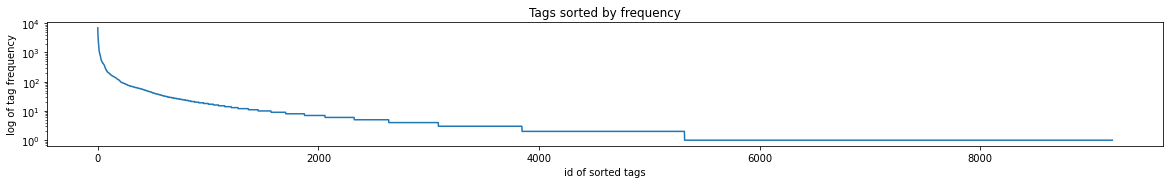

In [ ]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(2, 1, 1)
ax.plot(range(len(tag_dict)), list(tag_dict.values()))
ax.set_yscale('log')
ax.set_title('Tags sorted by frequency')
ax.set_xlabel('id of sorted tags')
ax.set_ylabel('log of tag frequency')
plt.plot()

## 2. Title analysis

### 2.1 Word cloud of titles

  0%|          | 0/50000 [00:00<?, ?it/s]

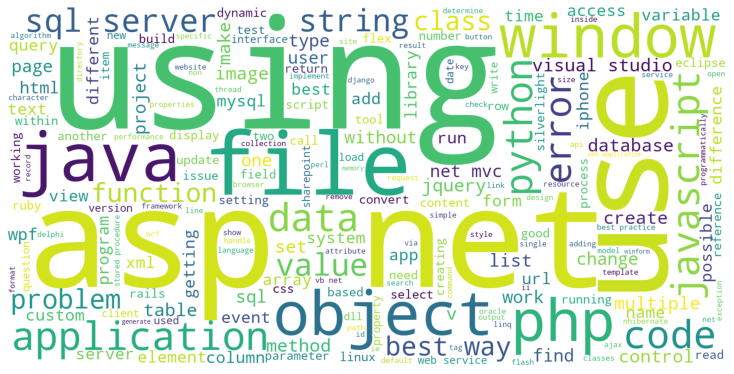

In [ ]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from tqdm.auto import tqdm # loading bar
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tqdm(df.Title[~df.Title.isnull()]):
      
  # typecaste each val to string 
  val = str(val) 

  # split the value 
  tokens = val.split() 
    
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower() 
    
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (16, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Most common words for a given tag

## **Bag of Words**

In [ ]:
df.Title.to_list()

['Can I use regular expressions to find a method on a class in java?',
 'Can Visual Studio put timestamps in the build log?',
 'Msbuild copy to several locations based on list of destination parameter?',
 'Why is my icon not being distributed to the device?',
 'How can I resolve the drifting clock for my Virtual Machine?',
 'GUI creation code layout theory?',
 'sql help: how can I add quantities together?',
 'Moving from ADFS to the Geneva Framework',
 'Is this a bug with Advantage Database?',
 'How to know a file is finished copying',
 'Form bean to session variable',
 'Best practice for application-icon in windows',
 'Accessing struct members directly',
 'Why LocalTime displays server time and not browser time?',
 'LNK2001 error when compiling apps referencing STLport-5.1.4 with VC++ 2008',
 'Accessing private members',
 "How to automate Visual Studio's Code Metrics feature",
 'MySQL - Views Alternative',
 'Separating CSS deployment from rest of site',
 'Displaying Sub Report Data fr

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import nltk.stem as stemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')
nltk.download('punkt')

# instantiate stemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk import word_tokenize
from nltk.tokenize import MWETokenizer

# add exceptions to tokenizer
tokenizer = nltk.tokenize.MWETokenizer()
tokenizer.add_mwe(('c', '#'))

In [ ]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(text):
    result = []
    # remove ponctuation but keep relevant data
    initial_preprocess = lambda text : "".join([char for char in text if char not in '!"$%&\'()*,./:;<=>?@[\\]^_`{|}~']).lower()
    tokens = tokenizer.tokenize(word_tokenize(initial_preprocess(text)))
    for token in tokens:
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(lemmatize_stemming(token))
    return result

In [ ]:
processed_titles = df.Title.map(preprocess)

In [ ]:
processed_titles

0             [use, regular, express, method, class, java]
1                  [visual, studio, timestamp, build, log]
2        [msbuild, copi, locat, base, list, destin, par...
3                                 [icon, distribut, devic]
4                  [resolv, drift, clock, virtual, machin]
                               ...                        
49995                                [use, sitefin, theme]
49996                [send, data, aspnet, page, pop, page]
49997                                   [ftse, price, fee]
49998            [msmq, instal, use, msmq, commun, applic]
49999                    [re-add, servic, refer, properli]
Name: Title, Length: 50000, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(processed_titles)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 class
1 express
2 java
3 method
4 regular
5 use
6 build
7 log
8 studio
9 timestamp
10 visual


In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(title) for title in processed_titles]


In [ ]:
def sample_nlp_pipeline(sample_idx):
  print('sample idx:', sample_idx)

  print('saple tags:', df.Tags.to_list()[sample_idx])
  print('\nprocessing pipeline: \n')
  print('sample title:', df.Title.to_list()[sample_idx])
  print('preprocessed title:', processed_titles[sample_idx])
  print('bow_corpus of title:', bow_corpus[sample_idx])
  print('bag of words equivalence: \n')
  bow_doc_sample = bow_corpus[sample_idx]
  for i in range(len(bow_doc_sample)):
      print("Word {} (\"{}\") appears {} time.".format(bow_doc_sample[i][0], 
                                                dictionary[bow_doc_sample[i][0]], bow_doc_sample[i][1]))


In [ ]:
sample_nlp_pipeline(1)

sample idx: 1
saple tags: ['visual-studio', 'build']

processing pipeline: 

sample title: Can Visual Studio put timestamps in the build log?
preprocessed title: ['visual', 'studio', 'timestamp', 'build', 'log']
bow_corpus of title: [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
bag of words equivalence: 

Word 6 ("build") appears 1 time.
Word 7 ("log") appears 1 time.
Word 8 ("studio") appears 1 time.
Word 9 ("timestamp") appears 1 time.
Word 10 ("visual") appears 1 time.


In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=1000, id2word=dictionary, passes=2, workers=2)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.001*"instead" + 0.001*"liter" + 0.001*"lamp" + 0.001*"contract" + 0.001*"udp" + 0.001*"retain" + 0.001*"smart" + 0.001*"vector" + 0.001*"increas" + 0.001*"webconfig"
Topic: 1 
Words: 0.001*"instead" + 0.001*"liter" + 0.001*"lamp" + 0.001*"contract" + 0.001*"udp" + 0.001*"retain" + 0.001*"smart" + 0.001*"vector" + 0.001*"increas" + 0.001*"webconfig"
Topic: 2 
Words: 0.797*"queri" + 0.198*"sql" + 0.001*"linq" + 0.001*"insert" + 0.001*"work" + 0.000*"unit" + 0.000*"test" + 0.000*"project" + 0.000*"udp" + 0.000*"instead"
Topic: 3 
Words: 0.632*"save" + 0.323*"extract" + 0.036*"data" + 0.002*"text" + 0.001*"replac" + 0.001*"code" + 0.000*"new" + 0.000*"increas" + 0.000*"multi-thread" + 0.000*"contract"
Topic: 4 
Words: 0.001*"instead" + 0.001*"liter" + 0.001*"lamp" + 0.001*"contract" + 0.001*"udp" + 0.001*"retain" + 0.001*"smart" + 0.001*"vector" + 0.001*"increas" + 0.001*"webconfig"
Topic: 5 
Words: 0.001*"instead" + 0.001*"liter" + 0.001*"lamp" + 0.001*"contract" + 0.00

In [ ]:
def infer_topic_score(sample_idx):
  for index, score in sorted(lda_model[bow_corpus[sample_idx]], key=lambda tup: -1*tup[1]):
      print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

In [ ]:
idx = 1
sample_nlp_pipeline(idx)
infer_topic_score(idx)

sample idx: 1
saple tags: ['visual-studio', 'build']
processing pipeline: 

sample title: Can Visual Studio put timestamps in the build log?
preprocessed title: ['visual', 'studio', 'timestamp', 'build', 'log']
bow_corpus of title: [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
bag of words equivalence: 

Word 6 ("build") appears 1 time.
Word 7 ("log") appears 1 time.
Word 8 ("studio") appears 1 time.
Word 9 ("timestamp") appears 1 time.
Word 10 ("visual") appears 1 time.

Score: 0.3334999978542328	 
Topic: 0.538*"visual" + 0.458*"studio" + 0.001*"use" + 0.000*"set" + 0.000*"c++" + 0.000*"indent" + 0.000*"c_#" + 0.000*"differ" + 0.000*"multi-thread" + 0.000*"increas"

Score: 0.16683335602283478	 
Topic: 0.750*"timestamp" + 0.103*"file" + 0.031*"javascript" + 0.029*"chang" + 0.019*"server" + 0.012*"deploy" + 0.008*"web" + 0.005*"sum" + 0.003*"column" + 0.002*"valu"

Score: 0.16683334112167358	 
Topic: 0.946*"log" + 0.029*"server" + 0.019*"sql" + 0.000*"data" + 0.000*"best" + 0.000*"tool" + 0

In [ ]:
idx = 11000
sample_nlp_pipeline(idx)
print("\n#####\nprediction:\n")
infer_topic_score(idx)

sample idx: 11000
saple tags: ['arrays', 'powershell']

processing pipeline: 

sample title: PowerShell array initialization
preprocessed title: ['powershel', 'array', 'initi']
bow_corpus of title: [(91, 1), (390, 1), (922, 1)]
bag of words equivalence: 

Word 91 ("array") appears 1 time.
Word 390 ("powershel") appears 1 time.
Word 922 ("initi") appears 1 time.

#####
prediction:


Score: 0.250249981880188	 
Topic: 0.896*"powershel" + 0.053*"file" + 0.011*"way" + 0.006*"workspac" + 0.003*"-" + 0.003*"databas" + 0.002*"oracl" + 0.001*"chang" + 0.001*"delet" + 0.001*"queri"

Score: 0.250249981880188	 
Topic: 0.531*"initi" + 0.156*"border" + 0.156*"hover" + 0.117*"home" + 0.017*"doesnt" + 0.010*"control" + 0.003*"color" + 0.002*"user" + 0.001*"background" + 0.001*"add"

Score: 0.250249981880188	 
Topic: 0.784*"array" + 0.194*"argument" + 0.015*"php" + 0.002*"object" + 0.001*"pass" + 0.001*"type" + 0.000*"interfac" + 0.000*"implement" + 0.000*"instanc" + 0.000*"multi-thread"


In [ ]:
# test on unseen data
unseen_title = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_title))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.2502500116825104	 Topic: 0.585*"integr" + 0.243*"deal" + 0.138*"continu" + 0.013*"way" + 0.007*"applic"
Score: 0.250249981880188	 Topic: 0.470*"ident" + 0.279*"openid" + 0.114*"week" + 0.104*"appl" + 0.004*"access"
Score: 0.24802488088607788	 Topic: 0.640*"googl" + 0.258*"enabl" + 0.096*"chrome" + 0.001*"javascript" + 0.000*"detect"
